# 1. Obrada i prikaz podataka
U ovom izvješću biti će učitani podatci, te objašnjena karakteristika baze podataka. Uz to biti će i izračunati medijani određenih značajki. Nad podatcima biti će napravljena provjera za "outliner" podatcima. Na kraju će i grafički biti prikzani podatci.

In [100]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px

## 1.1 Učitavanje podataka

In [122]:
dir = "Data"

#dict students sadrži dataframove sa svakog testa za tog studenta
students ={}

for s in os.listdir(dir):
    dir2 = os.path.join(dir, s)
    exams = {}
    for exam in os.listdir(dir2):
        dir3 = os.path.join(dir2, exam)
        
        # Get CSV files list from a folder
        csv_files = {}
        for filename in os.listdir(dir3):
            df_list = []
            f = os.path.join(dir3, filename)
            if f.endswith(".csv") and os.stat(f).st_size != 0:
                name = os.path.splitext(filename)[0] 
                if name == "ACC":    
                    csv_files[f] = ["ACCx","ACCy","ACCz"]
                elif name == "IBI":
                    csv_files[f] = ["IBI_time","IBI_duration"]
                else:
                    csv_files[f] = [name]
        # Read each CSV file into DataFrame
        # This creates a list of dataframes
        df_list = (pd.read_csv(k, names = v ,skiprows=2) for k,v in csv_files.items())
        df_list=list(df_list)
        exams[exam]=df_list
    students[s]=exams
    

Objašnjenja značajki:

ACC
Data from 3-axis accelerometer sensor. The accelerometer is configured to measure acceleration in the range [-2g, 2g]. Therefore the unit in this file is 1/64g.
Data from x, y, and z axis are respectively in first, second, and third column.

BVP
Data from photoplethysmograph.

EDA
Data from the electrodermal activity sensor expressed as microsiemens (μS).

HR
Average heart rate extracted from the BVP signal.The first row is the initial time of the session expressed as unix timestamp in UTC.

IBI
Time between individuals heart beats extracted from the BVP signal.
No sample rate is needed for this file.
The first column is the time (respect to the initial time) of the detected inter-beat interval expressed in seconds (s).
The second column is the duration in seconds (s) of the detected inter-beat interval (i.e., the distance in seconds from the previous beat).

TEMP
Data from temperature sensor expressed degrees on the Celsius (°C) scale.

Ove značajke uvije će biti u listi na istoj poziciji te će svaka imati svoj dataframe.


In [52]:
#primjer ispisa svih podataka za studenta1 sa finalnog ispita

for X in students["S1"]["Final"]:
    print(X.head())
    print(X.shape)
    print(X.describe())

   ACCx  ACCy  ACCz
0    -3    65     6
1    -3    65     6
2    -3    65     6
3    -3    65     6
4    -3    65     6
(748686, 3)
                ACCx           ACCy           ACCz
count  748686.000000  748686.000000  748686.000000
mean      -15.147696      -2.671894       0.865034
std        33.683219      30.311671      42.862523
min      -128.000000    -128.000000    -128.000000
25%       -42.000000      -9.000000     -32.000000
50%        -7.000000       1.000000      -1.000000
75%         0.000000       6.000000      40.000000
max       127.000000     127.000000     127.000000
   BVP
0 -0.0
1 -0.0
2 -0.0
3 -0.0
4 -0.0
(1497375, 1)
                BVP
count  1.497375e+06
mean   2.804909e-04
std    4.479241e+01
min   -1.631490e+03
25%   -3.470000e+00
50%    2.000000e-02
75%    3.350000e+00
max    2.659680e+03
        EDA
0  0.000000
1  0.005125
2  0.020501
3  0.021783
4  0.023064
(93582, 1)
                EDA
count  93582.000000
mean       0.102925
std        0.083391
min        

      HR
0  50.00
1  53.50
2  61.00
3  91.25
4  89.60
(11992, 1)
                 HR
count  11992.000000
mean     108.256690
std       28.104029
min       50.000000
25%       87.080000
50%      104.520000
75%      122.970000
max      205.020000


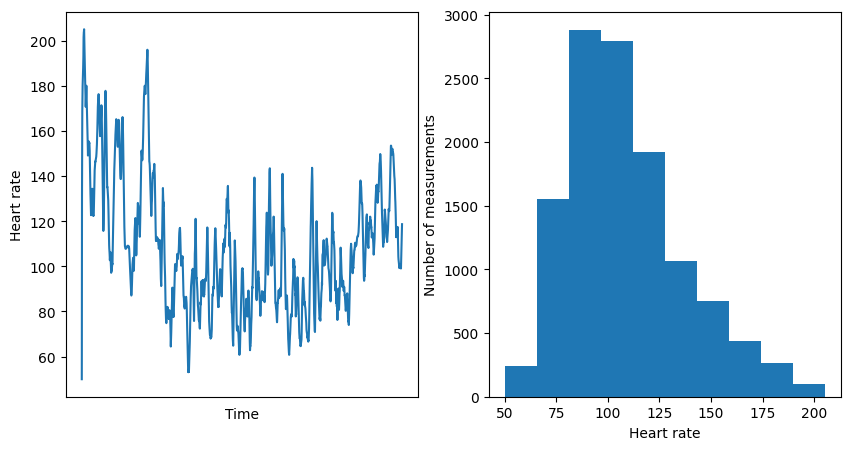

In [93]:
#primjer ispisa otkucaja srca za studenta5 na Midterm 1
X = pd.DataFrame(students["S5"]["Midterm 1"][3])
print(X.head())
print(X.shape)
print(X.describe())

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Heart rate')
ax[0].set_xticks([])
ax[0].plot(X)

ax[1].set_xlabel('Heart rate')
ax[1].set_ylabel('Number of measurements')
ax[1].hist(X)
plt.show()

In [121]:
#3-d visualization of ACC variables on student 7 during Midterm 1
X_tmp1 = pd.DataFrame(students["S7"]["Midterm 1"][0])


fig = px.scatter_3d(X_tmp1[0:20000], x='ACCx', y='ACCy', z='ACCz',
               opacity=0.5)
fig.show()

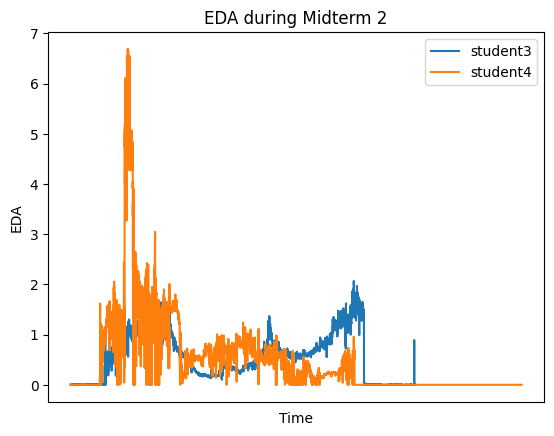

In [69]:
#comparing the EDA values between student3 and student4
X_tmp1 = pd.DataFrame(students["S3"]["Midterm 2"][2])
X_tmp2 = pd.DataFrame(students["S4"]["Midterm 2"][2])

plt.xlabel('Time')
plt.xticks([])
plt.ylabel('EDA')
plt.title('EDA during Midterm 2')
plt.plot(X_tmp1, label ='student3')
plt.plot(X_tmp2, label ='student4')
plt.legend(loc='best')
plt.show()

    TEMP   TEMP   TEMP   TEMP   TEMP   TEMP   TEMP   TEMP   TEMP   TEMP
0  22.51  22.11  22.63  22.07  21.81  22.23  22.39  22.21  22.61  22.23
1  22.51  22.11  22.63  22.07  21.81  22.23  22.39  22.21  22.61  22.23
2  22.51  22.11  22.63  22.07  21.81  22.23  22.39  22.21  22.61  22.23
3  22.51  22.11  22.63  22.07  21.81  22.23  22.39  22.21  22.61  22.23
4  22.51  22.11  22.63  22.07  21.81  22.23  22.39  22.21  22.61  22.23
(50720, 10)
               TEMP          TEMP          TEMP          TEMP          TEMP  \
count  44712.000000  46744.000000  47936.000000  48848.000000  46776.000000   
mean      26.418379     26.022988     28.694811     26.730124     25.405085   
std        2.214751      2.278360      4.596582      2.817996      1.793332   
min       22.490000     22.090000     22.610000     22.070000     21.750000   
25%       23.590000     23.170000     23.470000     23.470000     23.770000   
50%       27.590000     27.010000     29.170000     27.670000     26.490000   
75%

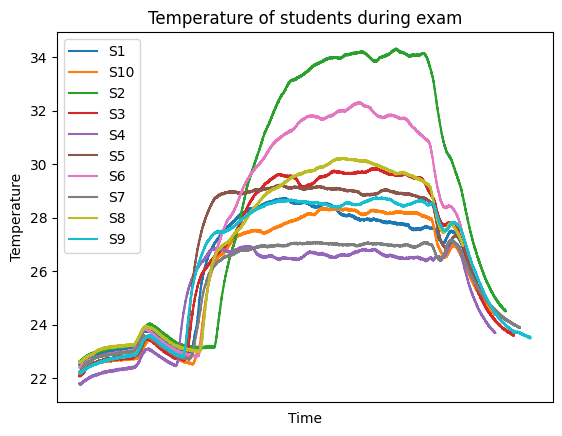

In [78]:
#comparing temperatures from all 10 students on Midterm 1 exam
X_tmp_lst=[]
labels=[]
for k,v in students.items():
    labels.append(k)
    X_tmp_lst.append(v["Midterm 1"][6])
X_tmp = pd.concat(X_tmp_lst, axis = 1)

print(X_tmp.head())
print(X_tmp.shape)
print(X_tmp.describe())

plt.xlabel('Time')
plt.xticks([])
plt.ylabel('Temperature')
plt.title('Temperature of students during exam')
plt.plot(X_tmp, label = labels)
plt.legend(loc='best')
plt.show()